# Questao 1
O conjunto de microdados do ENEM 2022 possui 3.476.105 linhas, uma numerosidade muito grande para nosso contexto. Sua primeira tarefa é fazer a leitura do arquivo CSV por blocos e então realizar filtragem e amostragem em cada bloco para diminuir a numerosidade, salvando ao final um CSV com numerosidade reduzida. Tente alcançar uma tabela entre 50mil e 100mil linhas.
Para leitura por blocos, use a opção chunksize de read_csv

In [2]:
import pandas as pd


db = pd.read_csv('micro_dados/MICRODADOS_ENEM_2022.csv', encoding="cp1252",delimiter=";")
db_ba = db[ db["SG_UF_ESC"]=="BA" ]
db_mg = db[ db["SG_UF_ESC"]=="MG" ]


In [3]:
print(len(db_ba))
print(db_ba.shape)

44483
(44483, 76)


In [4]:
print(len(db_mg))
print(db_mg.shape)

68869
(68869, 76)


In [5]:
db_ba.to_csv("base_dados_ma_ba.csv",encoding="cp1252")

In [ ]:
db_mg.to_csv("base_dados_ma_mg.csv",encoding="cp1252")

Load data

In [2]:
import pandas as pd
db = pd.read_csv('base_dados.csv', encoding="cp1252")
db.columns

Index(['Unnamed: 0', 'NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', '

# Questão 2

Com base no conjunto de dados reduzido, crie um subconjunto de dados, que será utilizado para predição da faixa de notas de uma prova do ENEM.

## a)
Para este subconjunto escolha um atributo de nota de uma das provas do ENEM, selecione também 10 outros atributos não relacionados às provas (não pertencentes aos atributos da seção Dados da Prova Objetiva nem da seção Dados da Redação). 


resp: idade, tipo escola, Q006,Q024,Q025,sexo, estado civil,Q021, TP_ST_CONCLUSAO,Q005

pq escolheu cada um, pode colocar em bloco de atributo,


## b)

Para o atributo de nota da prova escolhida, crie um novo atributo com a discretização da nota em 4 quartis (apresente os valores delimitantes), e seleciona somente as linhas pertencentes ao primeiro e ao quarto quartil. 


In [3]:
dados = db['NU_NOTA_REDACAO'].describe()
dados = dados['25%'],dados['75%']
colunas = [ "TP_FAIXA_ETARIA", 'TP_ENSINO', 'Q006','Q024','Q025','TP_SEXO', 'TP_ESTADO_CIVIL','Q021', 'TP_ST_CONCLUSAO','Q005']
db_ = db[((db['NU_NOTA_REDACAO'] != 0) & (db['NU_NOTA_REDACAO'] < dados[0])) | (db['NU_NOTA_REDACAO'] > dados[1])].get(colunas).copy()
db_['result'] = (db['NU_NOTA_REDACAO'] > dados[1]) *1
db_['result']

6        0
8        1
10       0
11       0
15       0
        ..
54584    0
54585    1
54588    0
54595    0
54596    1
Name: result, Length: 17091, dtype: int32

## c)

Analise os demais atributos, verifique os valores existentes e sua distribuição, verifique a existência de dados ausentes. Determine e realize os procedimentos de pré-processamento necessários. Pode ser necessário transformar atributos categóricos (por exemplo, transformando alguns valores categóricos em um valor único, ou aplicando one-hot-encoding). Pode ser necessário normalizar ou padronizar atributos. Pode haver demanda de imputar valores ou excluir linhas com dados ausentes. Você pode também criar/transformar outros atributos (por exemplo, discretizando valores numéricos, combinando dois atributos em um único atributo).


In [4]:
db_.dropna(inplace=True)
db_['result'].sum(),db_.shape

(3173, (5332, 11))

In [16]:
db_['TP_SEXO'] = (db_['TP_SEXO'] == 'M')* 1
db_['Q021'] = (db_['Q021'] == 'A')* 1
db_.drop(db_[db_['TP_ESTADO_CIVIL'] == 0].index,inplace=True )
db_['Q025']= db_['Q025'].apply(lambda x: ord(x) - ord('A'))
db_['Q024']= db_['Q024'].apply(lambda x: ord(x) - ord('A'))
db_['Q006']= db_['Q006'].apply(lambda x: ord(x) - ord('A'))

In [17]:
db_

,TP_FAIXA_ETARIA,TP_ENSINO,Q006,Q024,Q025,TP_SEXO,TP_ESTADO_CIVIL,Q021,TP_ST_CONCLUSAO,Q005,result
15,3,1.0,3,0,1,0,1,0,2,3,0
35,4,1.0,3,1,1,0,1,0,2,5,0
44,3,1.0,7,2,1,0,1,0,2,4,1
55,5,1.0,1,0,1,0,1,0,2,4,0
79,3,1.0,1,0,1,0,1,0,2,4,0
...,...,...,...,...,...,...,...,...,...,...,...
54518,4,1.0,5,0,1,0,1,0,2,2,0
54557,3,1.0,2,1,1,0,1,0,2,3,1
54559,2,1.0,3,0,1,0,1,0,2,4,1
54580,3,1.0,7,1,1,0,1,0,2,6,0


# Questão 3

Realize a tarefa de classificação: predição da faixa de nota discretizada da prova a partir dos demais atributos.

## a)

Defina e descreva seu método de avaliação e medidas de avaliação. 


In [55]:
from sklearn import  metrics
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier, plot_tree

X = db_.drop('result',axis='columns')
y = db_['result']

clf = DecisionTreeClassifier(max_depth=10).fit(X, y)

# cross_validate also allows to specify metrics which you want to see
mean = 0
for i, score in enumerate(cross_validate(clf, X,y, cv=10)["test_score"]):
    print(f"Accuracy for the fold no. {i} on the test set: {score}")
    mean += score
print('media das accuracy: ',mean/(i+1))

Accuracy for the fold no. 0 on the test set: 0.6839080459770115
Accuracy for the fold no. 1 on the test set: 0.6992337164750958
Accuracy for the fold no. 2 on the test set: 0.761996161228407
Accuracy for the fold no. 3 on the test set: 0.7504798464491362
Accuracy for the fold no. 4 on the test set: 0.7696737044145874
Accuracy for the fold no. 5 on the test set: 0.7735124760076776
Accuracy for the fold no. 6 on the test set: 0.761996161228407
Accuracy for the fold no. 7 on the test set: 0.8099808061420346
Accuracy for the fold no. 8 on the test set: 0.7696737044145874
Accuracy for the fold no. 9 on the test set: 0.727447216890595
media das accuracy:  0.750790183922754


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.tree import export_text
# Split data into 50% train and 10% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, shuffle=True, stratify=y, random_state=7)

clf = DecisionTreeClassifier(max_depth=20, random_state=7) #max_depth=2

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier DecisionTreeClassifier(max_depth=20, random_state=7):
              precision    recall  f1-score   support

           0       0.66      0.70      0.68       210
           1       0.79      0.76      0.77       312

    accuracy                           0.73       522
   macro avg       0.72      0.73      0.73       522
weighted avg       0.74      0.73      0.73       522




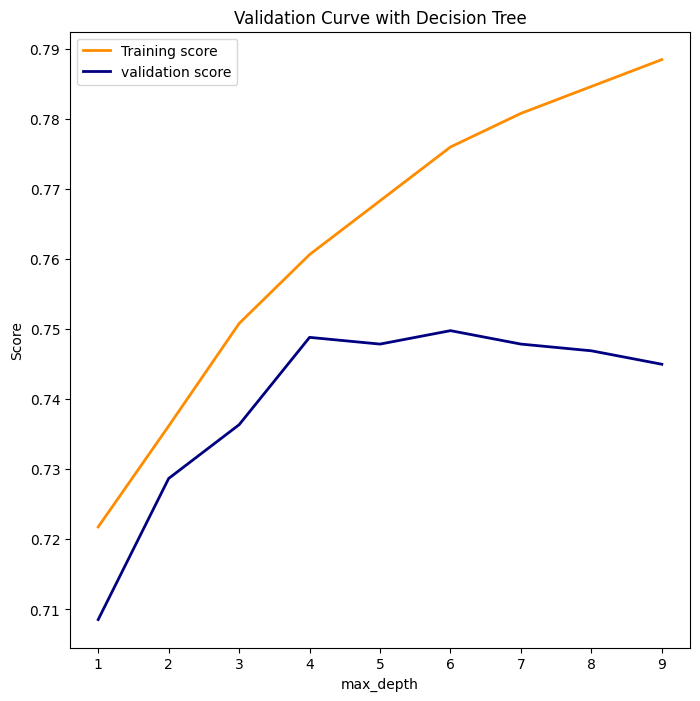

In [57]:

from sklearn.model_selection import validation_curve
from sklearn.model_selection import ShuffleSplit
import numpy as np

import matplotlib.pyplot as plt

param_range = np.arange(1, 10, 1)

rs = ShuffleSplit(n_splits=1, test_size=.20)

train_scores, test_scores = validation_curve(
    DecisionTreeClassifier(), X=X, y=y, param_name="max_depth",
    param_range=param_range, cv=rs.split(X), scoring="accuracy" )


train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

fig, ax = plt.subplots(figsize=(8, 8))
plt.title("Validation Curve with Decision Tree")
plt.xlabel("max_depth")
plt.ylabel("Score")
#plt.ylim(0.0, 1.1)
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=2)
plt.plot(param_range, test_scores_mean, label="validation score",
             color="navy", lw=2)
plt.legend(loc="best")
plt.show()